In [3]:
from __future__ import print_function, division
from builtins import range

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Dense, Embedding, Input
from keras.layers import LSTM, GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import keras.backend as K
if len(K.tensorflow_backend._get_available_gpus()) > 0:
  from keras.layers import CuDNNLSTM as LSTM
  from keras.layers import CuDNNGRU as GRU



# some HyperParameteres
MAX_SEQUENCE_LENGTH = 50
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 10
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 5





Using TensorFlow backend.


# Load Data and Preprocessing

In [4]:

# get the data at: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data
train = pd.read_csv("train.tsv", sep='\t')
sentences = train["Phrase"].values
targets = (train['Sentiment'].values > 3)
K = len(set(targets))



# convert the sentences (strings) into integers
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

print("max sequence length:", max(len(s) for s in sequences))
print("min sequence length:", min(len(s) for s in sequences))
s = sorted(len(s) for s in sequences)
print("median sequence length:", s[len(s) // 2])

maxlen = min(max(len(s) for s in sequences), MAX_SEQUENCE_LENGTH)


# get word -> integer mapping
word2idx = tokenizer.word_index
print('Found %s unique tokens.' % len(word2idx))


# pad sequences so that we get a N x T matrix
data = pad_sequences(sequences, maxlen=maxlen)
print('Shape of data tensor:', data.shape)




max sequence length: 49
min sequence length: 0
median sequence length: 4
Found 15288 unique tokens.
Shape of data tensor: (156060, 49)


# Making Model

Instructions for updating:
Colocations handled automatically by placer.
Training model...
Instructions for updating:
Use tf.cast instead.
Train on 124848 samples, validate on 31212 samples
Epoch 1/5
124848/124848 [==============================] - 32s 254us/step - loss: 0.2126 - acc: 0.9390 - val_loss: 0.1722 - val_acc: 0.9409
Epoch 2/5
124848/124848 [==============================] - 31s 246us/step - loss: 0.1290 - acc: 0.9493 - val_loss: 0.1680 - val_acc: 0.9378
Epoch 3/5
124848/124848 [==============================] - 31s 246us/step - loss: 0.1143 - acc: 0.9529 - val_loss: 0.1720 - val_acc: 0.9347
Epoch 4/5
124848/124848 [==============================] - 31s 245us/step - loss: 0.1071 - acc: 0.9543 - val_loss: 0.1756 - val_acc: 0.9359
Epoch 5/5
124848/124848 [==============================] - 31s 245us/step - loss: 0.1024 - acc: 0.9558 - val_loss: 0.1821 - val_acc: 0.9301


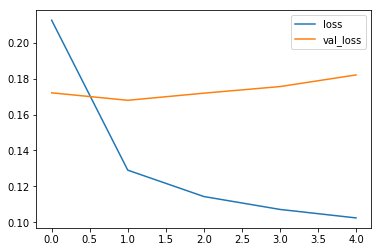

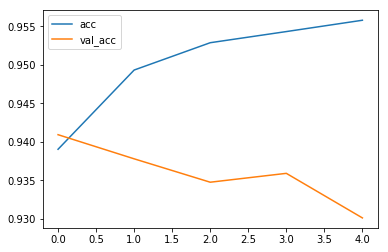

In [5]:
# create an LSTM network with a single LSTM
input_ = Input(shape=(maxlen,))
x = Embedding(len(word2idx) + 1, EMBEDDING_DIM)(input_)
x = LSTM(5)(x)
output = Dense(K, activation='softmax')(x)

model = Model(input_, output)
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

print('Training model...')
r = model.fit(
  data,
  targets,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()